In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DTC
import pickle

In [2]:
dataset = pd.DataFrame({"Emotional":['Yes','No','Yes','No','No','Yes'],
                        "Character":['Brave','Brave','Cunning','Cunning','Cunning','Cunning'],
                        "Class":['Gryffindor','Ravenclaw','Hufflepuff','Slytherin','Slytherin','Hufflepuff']})

In [3]:
dataset[['Brave','Cunning']] =pd.get_dummies(dataset['Character'],)

In [4]:
dataset.drop(columns='Character',inplace=True)

In [5]:
dataset['Emotional'],_ = pd.factorize(dataset['Emotional'])

In [6]:
dtc = DTC()
dtc.fit(dataset.drop(columns=['Class']),dataset['Class'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
from sklearn.tree import plot_tree

[Text(167.4, 181.2, 'X[0] <= 0.5\ngini = 0.722\nsamples = 6\nvalue = [1, 2, 1, 2]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0, 0]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 1, 2]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]')]

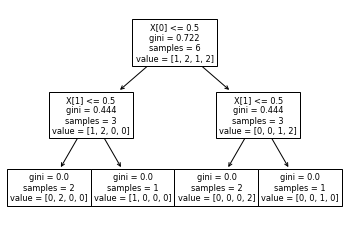

In [8]:
plot_tree(dtc)

In [9]:
dataset

,Emotional,Class,Brave,Cunning
0,0,Gryffindor,1,0
1,1,Ravenclaw,1,0
2,0,Hufflepuff,0,1
3,1,Slytherin,0,1
4,1,Slytherin,0,1
5,0,Hufflepuff,0,1


In [10]:
dtc.predict([[0,1,1]])

array(['Gryffindor'], dtype=object)

In [11]:
pickle.dump(dtc,open('Harry_Potter_model.pkl','wb'))

In [12]:
dataset.to_csv('Harrypotter.csv')